<img src='celestial sphere.png'>

# Lei de Benford

A **Lei de Benford**, também chamada de **lei do primeiro dígito**, **lei de Newcomb-Benford** e **lei números anômalos** refere-se à distribuição de dígitos em várias fontes de casos reais. Ao contrário da homogeneidade esperada, a lei afirma que em muitas coleções de números que ocorrem naturalmente, o primeiro dígito significativo provavelmente será pequeno. Sem homogeneidade, esta distribuição mostra que o dígito 1 tem 30% de chance de aparecer em um conjunto de dados estatísticos enquanto valores maiores tem menos possibilidade de aparecer.
Descoberta completamente ao acaso em 1881, a lei de Benford foi observada pela primeira vez pelo astrônomo canadense Simon Newcomb. Ele reparou que o livro de logaritmos que utilizava para seus cálculos estava com as primeiras páginas mais gastas do que as páginas próximas ao final.

Frank Benford demonstrou que esse resultado se aplica a uma ampla variedade de conjuntos de dados, incluindo contas de eletricidade, endereços, preços de ações, preços de casas, números de população, taxas de mortalidade, comprimentos de rios, constantes físicas e matemáticas. pelas leis de potência (que são muito comuns na natureza). Todas essas afirmações são calculadas ou definidas junto a uma escala logarítmica.

## Tabela

<img src='benford_table.JPG'>

## Distribuição da Lei de Benford
<img src='distribuicao_benford.JPG'>


## Lei de Benford em Data Science

A Lei de Benford é útil para a área de ciência de dados pois é uma maneira simples e eficiente de identificar anomalias na base de dados, demonstrando indícios de fraude.
Este <a href = 'https://www.researchgate.net/publication/227450787_Difficulties_Detecting_Fraud_The_Use_of_Benford%27s_Law_on_Regression_Tables'>paper</a> mostra como utilizar a Lei de Benford para identificação de fraudes.

Análise de fraude contábil, análise de preços e até como prova judicial.

Fonte: <a href = 'https://pt.wikipedia.org/wiki/Lei_de_Benford'>Wikipedia</a>

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

In [2]:
#importando dataset
df_youtube = pd.read_csv('youtube.csv')

In [3]:
df_youtube.head()

,title,views,likes,dislikes,comment_count
0,WE WANT TO TALK ABOUT OUR MARRIAGE,748374,57527,2966,15954
1,The Trump Presidency: Last Week Tonight with J...,2418783,97185,6146,12703
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",3191434,146033,5339,8181
3,Nickelback Lyrics: Real or Fake?,343168,10172,666,2146
4,I Dare You: GOING BALD!?,2095731,132235,1989,17518


In [4]:
#função para extração do primeiro dígito
def primeiro_digito(numero):
    return str(numero)[0]

In [5]:
df_youtube['likes']

0         57527
1         97185
2        146033
3         10172
4        132235
          ...  
40944     38160
40945     60008
40946     48068
40947    192957
40948    357079
Name: likes, Length: 40949, dtype: int64

In [6]:
#aplicando função da coluna de likes
df_youtube['likes'].apply(primeiro_digito)

0        5
1        9
2        1
3        1
4        1
        ..
40944    3
40945    6
40946    4
40947    1
40948    3
Name: likes, Length: 40949, dtype: object

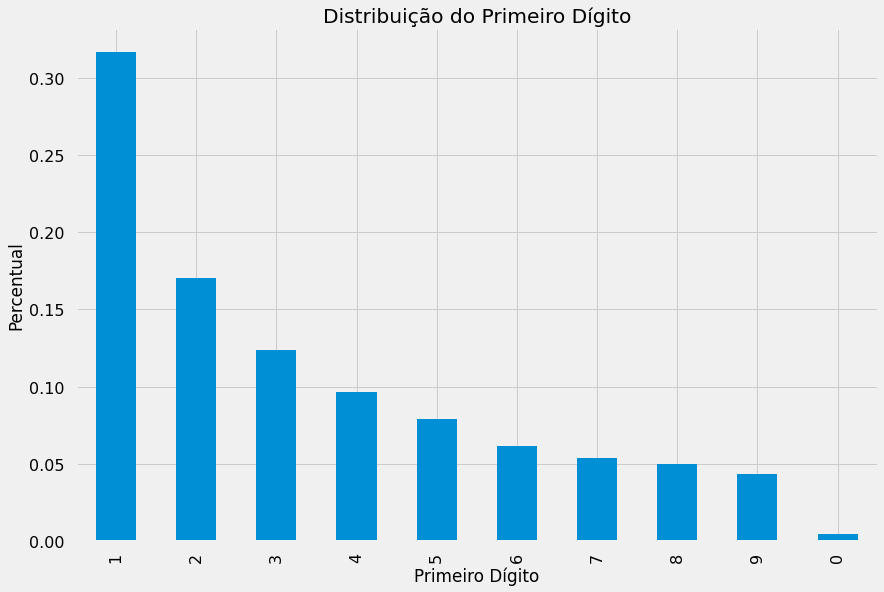

In [7]:
df_youtube['likes'].apply(primeiro_digito).value_counts(normalize = True).plot.bar(ylabel = 'Percentual',
xlabel = 'Primeiro Dígito', title = 'Distribuição do Primeiro Dígito')
plt.show()

Podemos observar que a distribuição se assemelha bastante com a Lei de Benford. Este é um indício de que os dados são verídicos.

Vamos incrementar nossa função para receber uma coluna numérica de um dataset e retornar a frequência dos dígitos.

In [8]:
#função para receber a coluna de um dataframe e retornar a frequência do primeiro dígito
def frequencia_digitos(coluna):
    filtro = coluna.apply(primeiro_digito) != '0'
    return coluna.loc[filtro].apply(primeiro_digito).value_counts(normalize = True)

In [9]:
#teste
frequencia_digitos(df_youtube['likes'])

1    0.318071
2    0.171248
3    0.124163
4    0.097187
5    0.079457
6    0.062094
7    0.053829
8    0.050151
9    0.043799
Name: likes, dtype: float64

## Fórmula da Lei de Benford

$$log_{10}\left ( 1 + \frac{1}{d} \right )$$


In [10]:
#exemplo
digito = 3
math.log10(1+1/digito)

0.12493873660829993

Vamos criar uma lista com a frequência esperada de cada número de acordo com a Lei de Benford.

In [11]:
lista_num = [1,2,3,4,5,6,7,8,9]
frequencia_esperada = [ math.log10(1+1/digito) for digito in lista_num ]
frequencia_esperada

[0.3010299956639812,
 0.17609125905568124,
 0.12493873660829993,
 0.09691001300805642,
 0.07918124604762482,
 0.06694678963061322,
 0.05799194697768673,
 0.05115252244738129,
 0.04575749056067514]

In [12]:
#função para comparar a frequência esperada com a frequência obtida
def benford(coluna):
    df_final = pd.DataFrame(index= [ str(digito) for digito in lista_num ])
    df_final['esperado'] = frequencia_esperada
    df_final['real'] = frequencia_digitos(coluna)
    df_final.plot.bar(ylabel = 'Percentual', xlabel = 'Primeiro Dígito', title = 'DISTRIBUIÇÃO DO PRIMEIRO DÍGITO \n'
                      'Real x Esperado')
    
    return df_final

,esperado,real
1,0.301030,0.305872
2,0.176091,0.176749
3,0.124939,0.123133
4,0.096910,0.094315
5,0.079181,0.078884
6,0.066947,0.066238
7,0.057992,0.057067
8,0.051153,0.052852
9,0.045757,0.044890


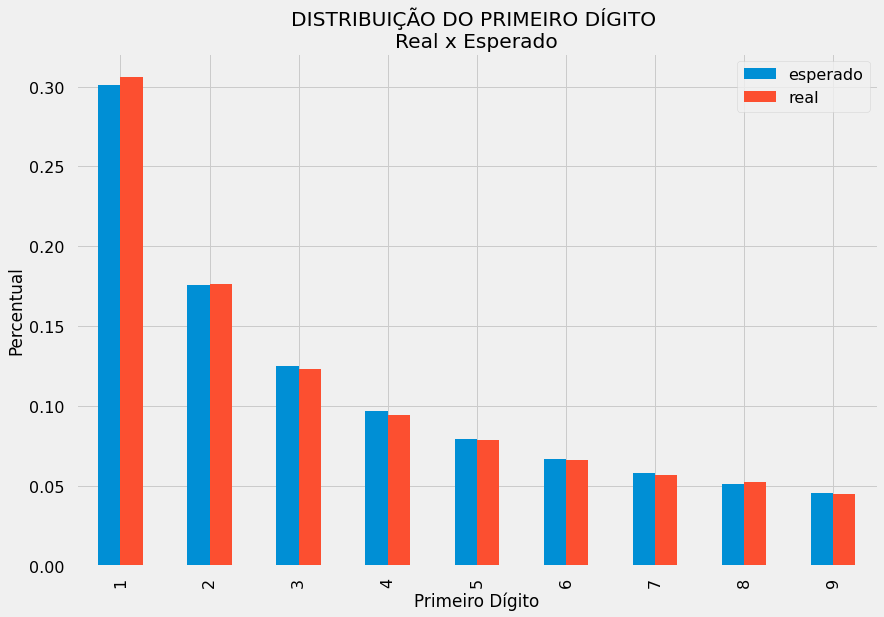

In [13]:
#testando em uma coluna
benford(df_youtube['dislikes'])

,esperado,real
1,0.301030,0.299421
2,0.176091,0.179711
3,0.124939,0.129185
4,0.096910,0.096193
5,0.079181,0.078708
6,0.066947,0.064544
7,0.057992,0.055044
8,0.051153,0.050355
9,0.045757,0.046839


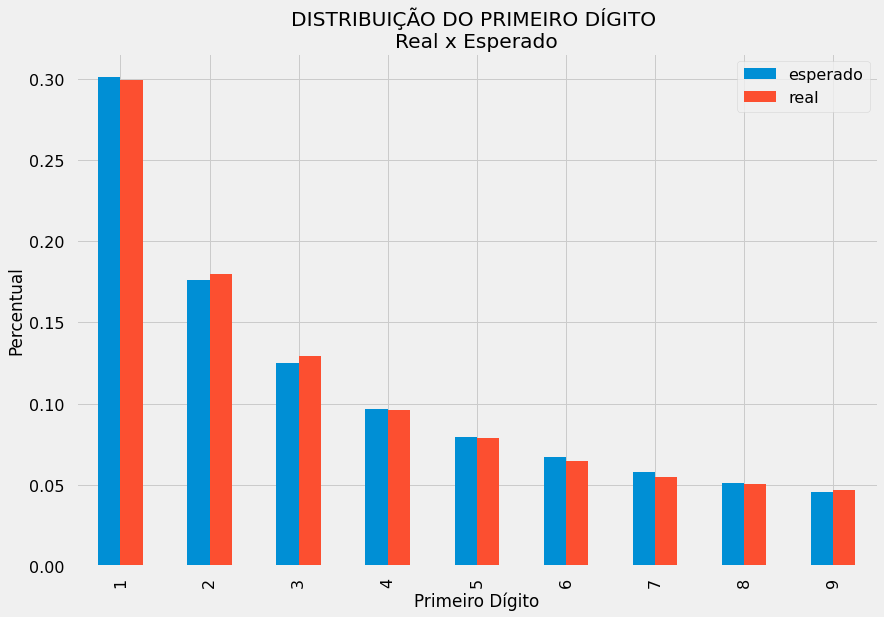

In [14]:
benford(df_youtube['views'])

,esperado,real
1,0.301030,0.305482
2,0.176091,0.174451
3,0.124939,0.122272
4,0.096910,0.097539
5,0.079181,0.078405
6,0.066947,0.066312
7,0.057992,0.060290
8,0.051153,0.049989
9,0.045757,0.045261


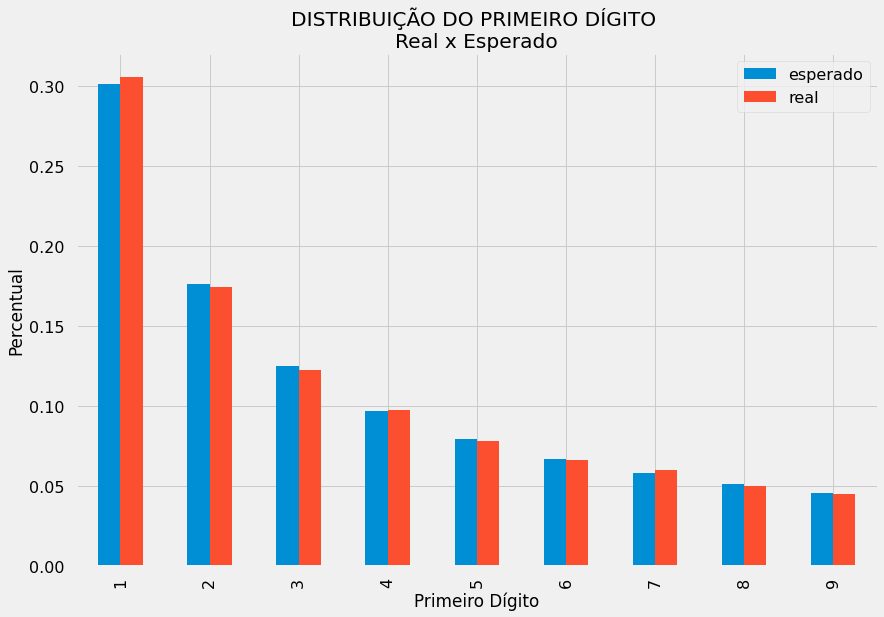

In [15]:
benford(df_youtube['comment_count'])

Analisando os gráficos acima das colunas numéricas, podemos perceber que a frequência obtida do primeiro dígito acompanha a frequência esperada, a Lei de Benford.

### Testando com outro dataset

In [16]:
#número de casos notificados da Covid
df_covid = pd.read_csv('covid_mundo.csv')
df_covid.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#printando todas as colunas
print(df_covid.columns.tolist())

['Country/Region', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Australia.1', 'Australia.2', 'Australia.3', 'Australia.4', 'Australia.5', 'Australia.6', 'Australia.7', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Canada.1', 'Canada.2', 'Canada.3', 'Canada.4', 'Canada.5', 'Canada.6', 'Canada.7', 'Canada.8', 'Canada.9', 'Canada.10', 'Canada.11', 'Canada.12', 'Canada.13', 'Canada.14', 'Canada.15', 'Central African Republic', 'Chad', 'Chile', 'China', 'China.1', 'China.2', 'China.3', 'China.4', 'China.5', 'China.6', 'China.7', 'China.8', 'China.9', 'China.10', 'China.11', 'China.12', 'China.13', 'China.14', 'China.15', 'China.16', 'China.17', 'China.18', 'China.19', 'China.20'

,esperado,real
1,0.301030,0.245421
2,0.176091,0.216117
3,0.124939,0.197802
4,0.096910,0.164835
5,0.079181,0.091575
6,0.066947,0.036630
7,0.057992,0.018315
8,0.051153,0.014652
9,0.045757,0.014652


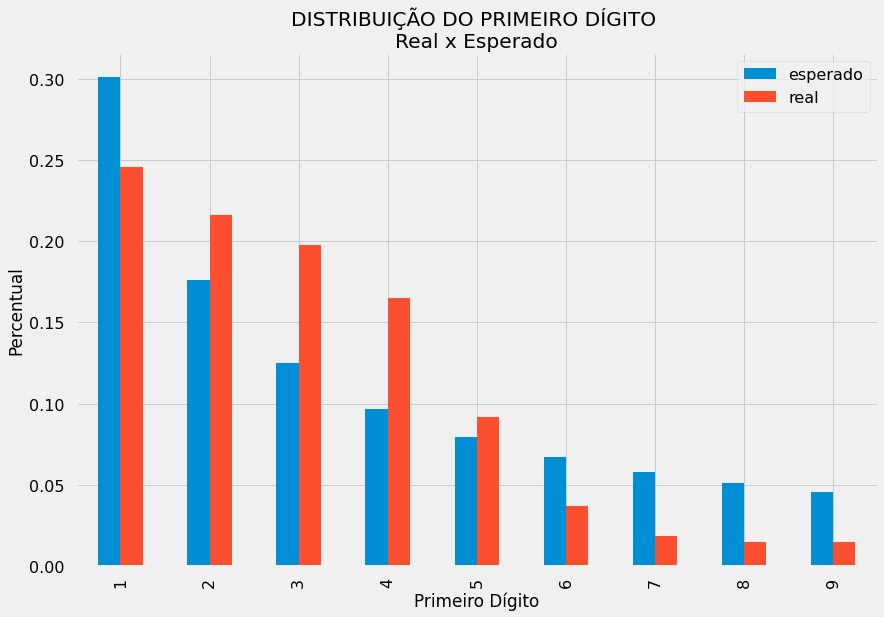

In [18]:
benford(df_covid['Brazil'])

Podemos ver que nesse caso, os números não acompanham a Lei de Benford. Uma causa possível seria a falta defasagem nas testagens no país e subnotificações.

Vejamos os dados de alguns países cujo monitoramento da Covid-19 foi feito de forma mais ampla e próxima do ideal (testagens altas e baixo índice de subnotificação).

,esperado,real
1,0.301030,0.299517
2,0.176091,0.222222
3,0.124939,0.120773
4,0.096910,0.062802
5,0.079181,0.082126
6,0.066947,0.062802
7,0.057992,0.043478
8,0.051153,0.043478
9,0.045757,0.053140


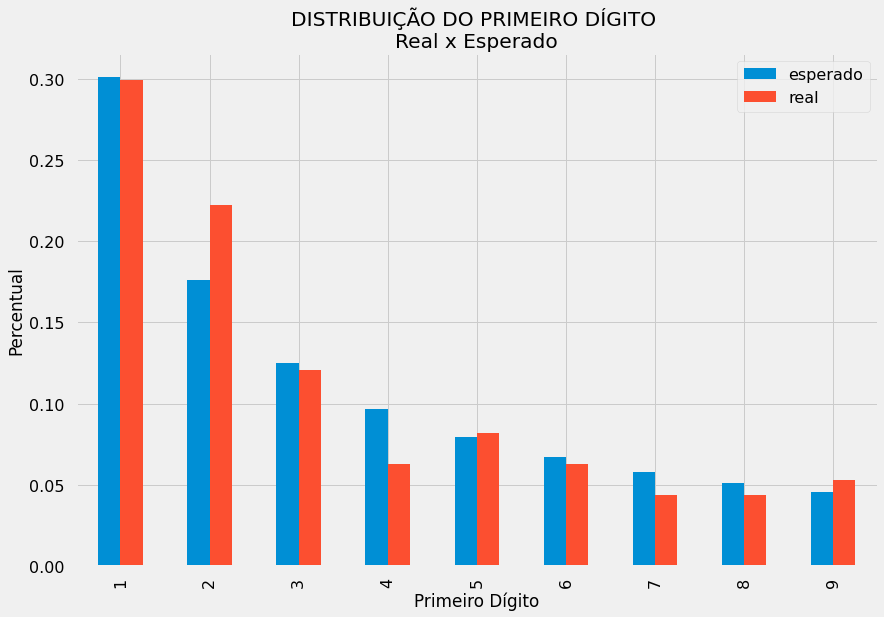

In [19]:
#Nova Zelândia
benford(df_covid['New Zealand'])

,esperado,real
1,0.301030,0.294118
2,0.176091,0.147059
3,0.124939,0.088235
4,0.096910,0.147059
5,0.079181,0.058824
6,0.066947,0.147059
7,0.057992,0.058824
8,0.051153,0.029412
9,0.045757,0.029412


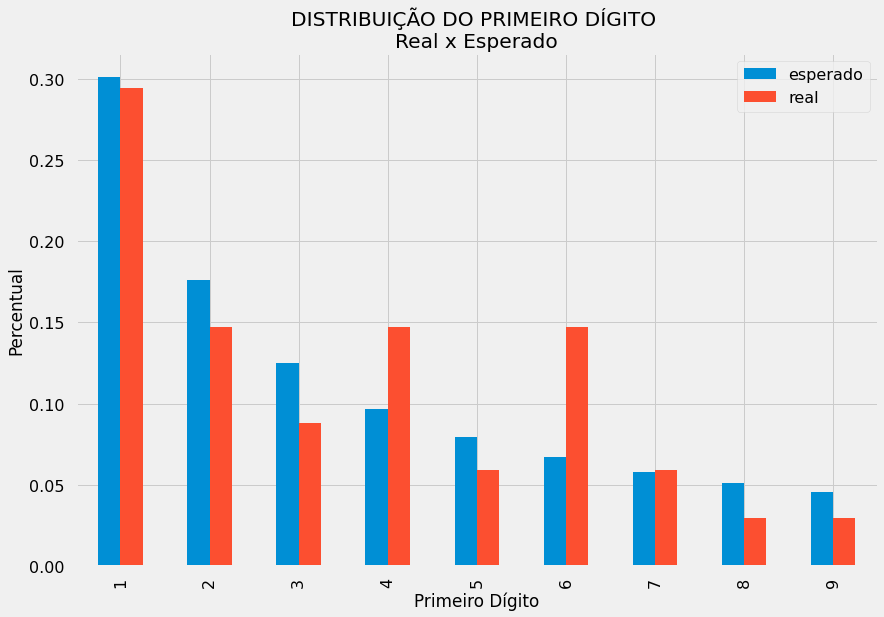

In [20]:
#Coreia do Sul
benford(df_covid['China'])

A diferença dos países que rastrearam melhor o vírus acabam tendo uma representação mais próxima da Lei de Benford na distribuição da frequência do primeiro dígito.